In [1]:
import matplotlib.pyplot as plt
import numpy as np
from BSM2 import *
from idaes.core.util.tables import (
    create_stream_table_dataframe,
    stream_table_dataframe_to_string,
)

In [2]:
starting_x_ba = 0.02
X_BA_reductions = [0.0, 0.5, 1.0]
# starting_X_BAs = [0.0, starting_x_ba, starting_x_ba]

if __name__ == "__main__":
    # This method builds and runs a steady state activated sludge
    # flowsheet for different X_BA reductions
    stream_tables = {}
    
    for i in range(len(X_BA_reductions)):
        X_BA_reduction = X_BA_reductions[i]
        # starting_X_BA = starting_X_BAs[i]
        m, results = main(starting_x_ba = starting_x_ba, x_ba_reduction = X_BA_reduction)

        stream_table = create_stream_table_dataframe(
            {
                "Feed": m.fs.FeedWater.outlet,
                "Mix": m.fs.R1.inlet,
                "CL": m.fs.CL.effluent, 
                "R1": m.fs.R1.outlet,
                "R2": m.fs.R2.outlet,
                "R3": m.fs.R3.outlet,
                "R4": m.fs.R4.outlet,
                "R5": m.fs.R5.outlet,
                "AD Inlet": m.fs.asm_adm.inlet,
                "Treated": m.fs.Treated.inlet
            },
            time_point=0,
        )
        stream_tables[f"Starting {starting_x_ba}, X_BA reduction {X_BA_reduction}"] = stream_table
        print(f"\nResults for X_BA reduction = {X_BA_reduction}:")
        print(stream_table_dataframe_to_string(stream_table))

2025-03-04 16:46:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.FeedWater.properties[0.0].alkalinity
2025-03-04 16:46:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.MX1.feed_water_state[0.0].alkalinity
2025-03-04 16:46:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.MX1.recycle_state[0.0].alkalinity
2025-03-04 16:46:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.MX1.mixed_state[0.0].alkalinity
2025-03-04 16:46:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.properties_in[0.0].alkalinity
2025-03-04 16:46:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.properties_out[0.0].alkalinity
2025-03-04 16:46:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.volume
2025-03-04 16:46:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R1]
2025-03-04 

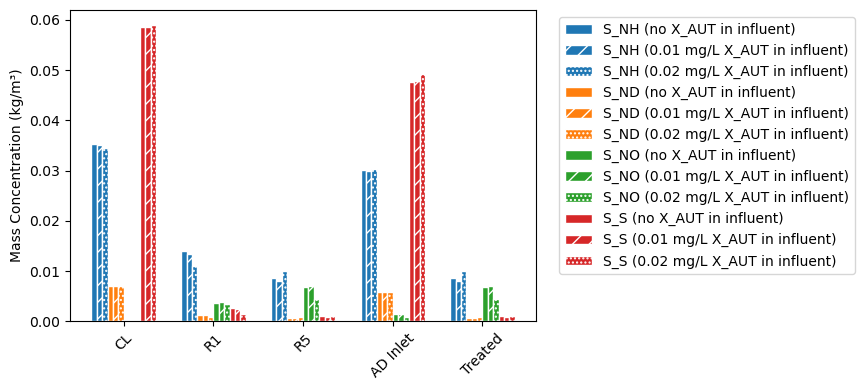

In [9]:
# Extract the relevant rows and convert to numeric values
species = ['S_NH', 'S_ND', 'S_NO', 'S_S']
locations = ['CL', 'R1', 'R5', "AD Inlet", 'Treated']

data_100 = []
data_0 = []
data_50 = []
stream_tables
for s in species:
    row_base = stream_tables[list(stream_tables.keys())[0]].loc[f'Mass Concentration {s}']
    row_0 = stream_tables[list(stream_tables.keys())[1]].loc[f'Mass Concentration {s}']
    row_50 = stream_tables[list(stream_tables.keys())[2]].loc[f'Mass Concentration {s}']
    # Extract only the values for the locations we want
    
    values_0 = [row_0[loc] for loc in locations]
    values_50 = [row_50[loc] for loc in locations]
    values_100 = [row_base[loc] for loc in locations]

    
    data_0.append(values_0)
    data_50.append(values_50)
    data_100.append(values_100)

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 4))
x = np.arange(len(locations))
width = 0.06  # Make bars thinner to fit side by side

for i in range(len(species)):
    offset = width * 3 * i
    # Base case bars
    ax.bar(x + offset, data_100[i], width, label=f'{species[i]} (no X_AUT in influent)', 
           color=f'C{i}', edgecolor='white')
   
    # 50% reduction bars
    ax.bar(x + offset + width, data_50[i], width, label=f'{species[i]} ({starting_x_ba*(1-X_BA_reductions[1])} mg/L X_AUT in influent)',
           color=f'C{i}', hatch='//', edgecolor='white')

    # No reduction bars
    ax.bar(x + offset + 2*width, data_0[i], width, label=f'{species[i]} ({starting_x_ba} mg/L X_AUT in influent)', 
           color=f'C{i}', hatch='....', edgecolor='white')
    

# Customize the chart
ax.set_ylabel('Mass Concentration (kg/m³)')
ax.set_xticks(x + width*5.5)
ax.set_xticklabels(locations)
ax.legend(loc='upper right', bbox_to_anchor=[1.7,1.0])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()